In [77]:
%run '~/git/Bibliotecas.ipynb'

In [78]:
print('\n\n\n\nExportação de Café\n\n')





Exportação de Café




In [79]:
e_c=pd.read_csv('~/git/Importacao-por-SH-e-Municipio/comex/EXP_1997_2024_20240215.csv', sep=';')
e_c.Município=e_c.Município.str.split('-',expand=True)[0].str.strip()
e_c

,Ano,Mês,Município,Codigo SH2,Descrição SH2,UF do Município,Valor FOB (US$),Quilograma Líquido
0,2024,1,Varginha,9,"Café, chá, mate e especiarias",Minas Gerais,139617535,41813033
1,2024,1,Guaxupé,9,"Café, chá, mate e especiarias",Minas Gerais,120042942,34865184
2,2024,1,Alfenas,9,"Café, chá, mate e especiarias",Minas Gerais,51385673,14502205
3,2024,1,Matipó,9,"Café, chá, mate e especiarias",Minas Gerais,28466201,8453320
4,2024,1,Manhuaçu,9,"Café, chá, mate e especiarias",Minas Gerais,23633214,7449046
...,...,...,...,...,...,...,...,...
12012,1997,3,Santa Luzia,9,"Café, chá, mate e especiarias",Minas Gerais,1475,214
12013,1997,2,Belo Horizonte,9,"Café, chá, mate e especiarias",Minas Gerais,1134,180
12014,1997,10,Santa Luzia,9,"Café, chá, mate e especiarias",Minas Gerais,940,200
12015,1997,10,Pará de Minas,9,"Café, chá, mate e especiarias",Minas Gerais,438,24


In [80]:
m_r_pa=pd.read_csv('~/git/Importacao-por-SH-e-Municipio/temp/m_r_pa.csv')

In [81]:
e_c_r_pa=e_c.merge(m_r_pa)
e_c_r_pa=e_c_r_pa[e_c_r_pa.columns[[0,1,-2,-1]]]
e_c_r_pa

,Ano,Mês,Valor FOB (US$),Quilograma Líquido
0,2024,1,15029934,4376565
1,2023,12,22005835,6749910
2,2023,6,19075308,4649515
3,2023,5,18842759,4599956
4,2023,11,17469938,5466650
...,...,...,...,...
2004,2006,6,31000,10000
2005,2006,5,16000,12000
2006,2006,3,9350,1000
2007,2006,11,7915,3700


# Limpa

In [82]:
e_c_r_pa[e_c_r_pa['Quilograma Líquido']<=0]

,Ano,Mês,Valor FOB (US$),Quilograma Líquido
1749,2020,9,10,0


In [83]:
e_c_r_pa=e_c_r_pa[e_c_r_pa['Quilograma Líquido']>0]

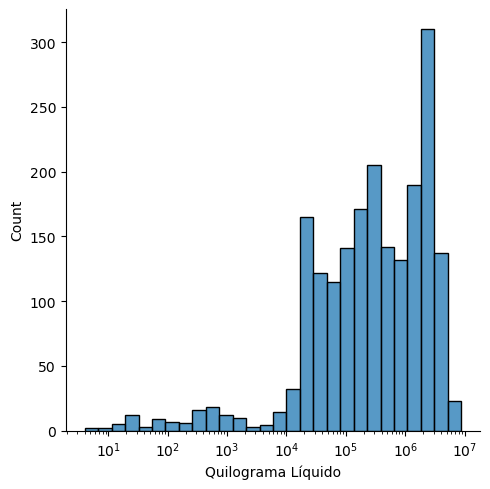

In [84]:
sns.displot(data=e_c_r_pa,x='Quilograma Líquido',log_scale=True)

In [85]:
e_c_r_pa['tipo_peso']='descartado'
e_c_r_pa.loc[e_c_r_pa['Quilograma Líquido']>10**3.1,'tipo_peso']='aprovado'
e_c_r_pa

,Ano,Mês,Valor FOB (US$),Quilograma Líquido,tipo_peso
0,2024,1,15029934,4376565,aprovado
1,2023,12,22005835,6749910,aprovado
2,2023,6,19075308,4649515,aprovado
3,2023,5,18842759,4599956,aprovado
4,2023,11,17469938,5466650,aprovado
...,...,...,...,...,...
2004,2006,6,31000,10000,aprovado
2005,2006,5,16000,12000,aprovado
2006,2006,3,9350,1000,descartado
2007,2006,11,7915,3700,aprovado


In [86]:
e_c_r_pa[e_c_r_pa['Valor FOB (US$)']<=0]

,Ano,Mês,Valor FOB (US$),Quilograma Líquido,tipo_peso


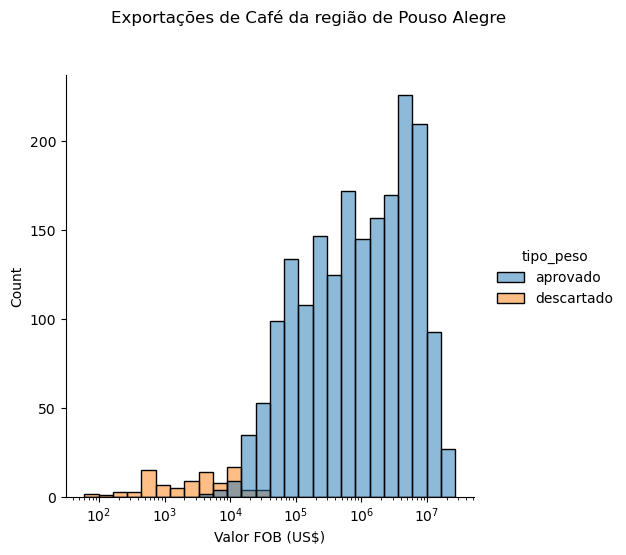

In [87]:
sns.displot(data=e_c_r_pa,x='Valor FOB (US$)',log_scale=True, hue='tipo_peso')\
.fig.suptitle('Exportações de Café da região de Pouso Alegre',y=1.1)
plt.show()

In [88]:
e_c_r_pa=e_c_r_pa[e_c_r_pa.tipo_peso=='aprovado']

In [89]:
e_c_r_pa=e_c_r_pa.drop(columns='tipo_peso')

In [90]:
e_c_r_pa=e_c_r_pa.sort_values(by=['Ano','Mês']).reset_index(drop=True)

In [91]:
e_c_r_pa.to_csv('~/git/Importacao-por-SH-e-Municipio/temp/e_c_r_pa.csv',index=False)